In [1]:
#import necessary packages
import tensorflow as tf
import pandas as pd

In [2]:
# importing data
dt = pd.read_csv('water_potability.csv')

In [3]:
# Check for null values
print(dt.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [4]:
# Imputation: Mean imputation
for col in ['ph', 'Sulfate', 'Trihalomethanes']:
  dt.fillna({col: dt[col].mean()}, inplace=True)

dt.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
# Looking for duplicates
dt.duplicated().sum()

0

In [6]:
#Selectin feature and target
x = dt[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = dt['Potability']


In [7]:
from sklearn.model_selection import train_test_split

# Splitting data for training, validating and testing
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {len(x_train)}")
print(f"Validation set size: {len(x_val)}")
print(f"Testing set size: {len(x_test)}")

Training set size: 2293
Validation set size: 491
Testing set size: 492


In [8]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [9]:
num_classes = len(set(y_train))

num_classes

2

In [10]:
print(y.value_counts())

Potability
0    1998
1    1278
Name: count, dtype: int64


In [34]:
#Building neural netwok model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential()

nn_model.add(Dense(units=20, activation='relu', input_shape=(x_train_scaled.shape[1],))) #input layer
nn_model.add(Dense(units=20, activation='relu')) #hidden layer

nn_model.add(Dense(units=1, activation='sigmoid')) #output layer

nn_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 20)                  │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Implementing early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [36]:
# optimizing the model
nn_model.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer='adam')

In [37]:
# Train the model
history = nn_model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping], batch_size=38)


Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5758 - loss: 0.6847 - val_accuracy: 0.6273 - val_loss: 0.6670
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6065 - loss: 0.6671 - val_accuracy: 0.6232 - val_loss: 0.6601
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6237 - loss: 0.6548 - val_accuracy: 0.6293 - val_loss: 0.6556
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6215 - loss: 0.6498 - val_accuracy: 0.6334 - val_loss: 0.6493
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6301 - loss: 0.6427 - val_accuracy: 0.6415 - val_loss: 0.6429
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6746 - loss: 0.6217 - val_accuracy: 0.6456 - val_loss: 0.6365
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6673 - loss: 0.6236 - val_accuracy: 0.6395 - val_loss: 0.6305
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6797 - loss: 0.6166 - val_accuracy: 0.6477 - v

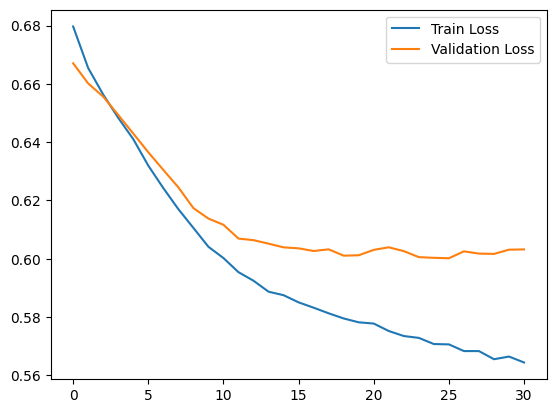

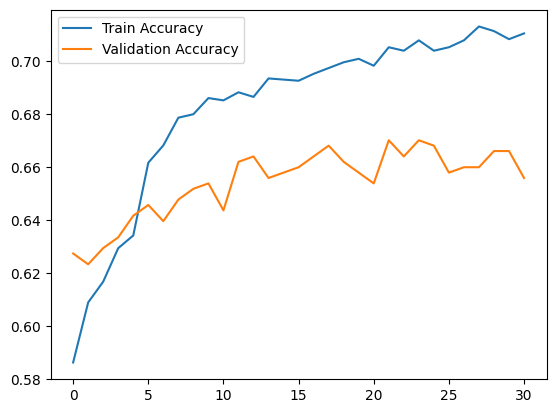

In [38]:
import matplotlib.pyplot as plt

# Plotting Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plotting Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [60]:
loss, accuracy = nn_model.evaluate(x_test_scaled, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6781 - loss: 0.6137
Test Loss: 0.6086
Test Accuracy: 0.6768


##**Trail1**

After training my model and evaluating it, it seems it is overfitting so I have to adjust it to make it generalize rather than memorizing.

In this trail I wanted to see how well the model wil work with 30 more neurons which means 50 neaurons total

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5768 - loss: 0.6863 - val_accuracy: 0.6395 - val_loss: 0.6569
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6135 - loss: 0.6537 - val_accuracy: 0.6456 - val_loss: 0.6404
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6539 - loss: 0.6288 - val_accuracy: 0.6701 - val_loss: 0.6235
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6659 - loss: 0.6236 - val_accuracy: 0.6701 - val_loss: 0.6068
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6941 - loss: 0.6013 - val_accuracy: 0.6965 - val_loss: 0.5988
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6989 - loss: 0.5850 - val_accuracy: 0.6965 - val_loss: 0.5936
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6935 - loss: 0.5889 - val_accuracy: 0.7067 - val_loss: 0.5931
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6974 - loss: 0.5801 - val_accuracy: 0.6986 - 

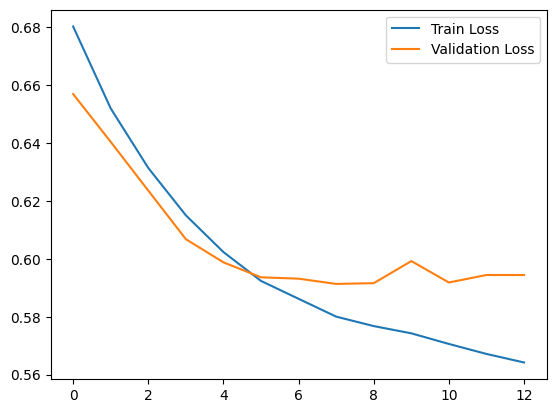

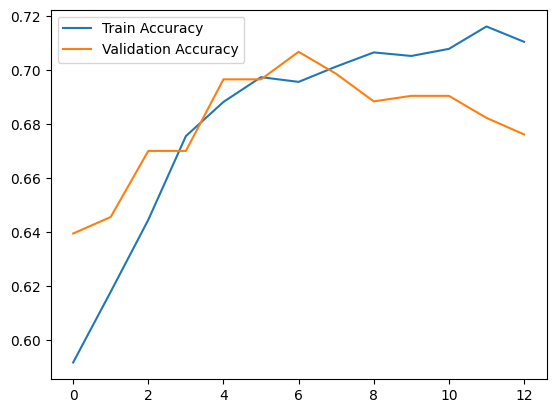

In [49]:
nn_model = Sequential()

nn_model.add(Dense(units=50, activation='relu', input_shape=(x_train_scaled.shape[1],))) #input layer
nn_model.add(Dense(units=50, activation='relu')) #hidden layer

nn_model.add(Dense(units=1, activation='sigmoid')) #output layer

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# optimizing
nn_model.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer='adam')

# traing and evaluating
history = nn_model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping], batch_size=38)

# Plotting Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plotting Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [18]:
loss, accuracy = nn_model.evaluate(x_test_scaled, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6679 - loss: 0.5937 
Test Loss: 0.5947
Test Accuracy: 0.6829


## **Trail2**

Here in this trail I continued with my first neurons I used which is 20 and here I did optimization first to see if it will reduce the overfitting of my model, I adjusted the learning rate to 0.001 and adjusted batchsize to 32
**bold text**

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5792 - loss: 0.6960 - val_accuracy: 0.6232 - val_loss: 0.6839
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5840 - loss: 0.6823 - val_accuracy: 0.6334 - val_loss: 0.6751
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5890 - loss: 0.6746 - val_accuracy: 0.6334 - val_loss: 0.6700
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6047 - loss: 0.6640 - val_accuracy: 0.6314 - val_loss: 0.6640
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6126 - loss: 0.6625 - val_accuracy: 0.6293 - val_loss: 0.6591
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6162 - loss: 0.6531 - val_accuracy: 0.6273 - val_loss: 0.6546
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6296 - loss: 0.6475 - val_accuracy: 0.6354 - val_loss: 0.6496
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6193 - loss: 0.6473 - val_accuracy: 0.6415 - v

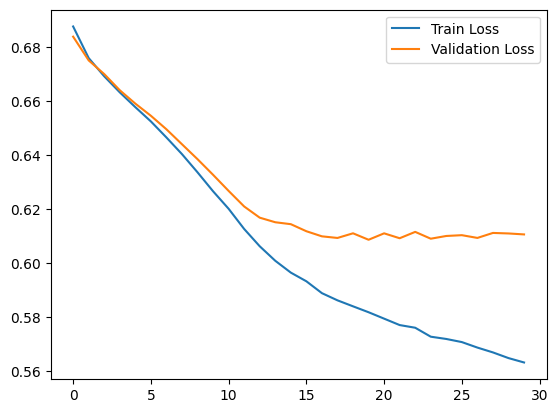

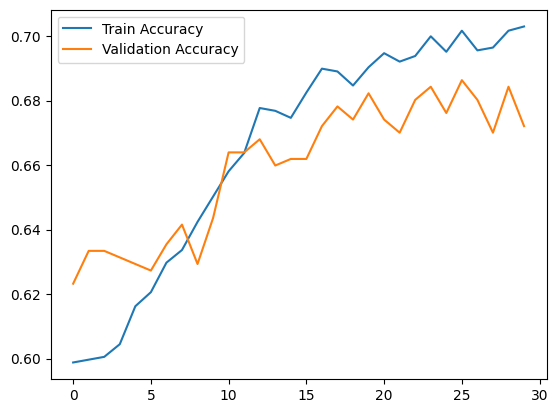

In [19]:
nn_model = Sequential()

nn_model.add(Dense(units=20, activation='relu', input_shape=(x_train_scaled.shape[1],))) #input layer
nn_model.add(Dense(units=20, activation='relu')) #hidden layer

nn_model.add(Dense(units=1, activation='sigmoid')) #output layer

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# optimizing
from tensorflow.keras.optimizers import Adam

# adding learning rate
optim = Adam(learning_rate=0.001)
nn_model.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer=optim)

# traing and evaluating
history = nn_model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping], batch_size=32)

# Plotting Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plotting Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [20]:
loss, accuracy = nn_model.evaluate(x_test_scaled, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6872 - loss: 0.5872 
Test Loss: 0.5954
Test Accuracy: 0.6850


## **Trial3**

After realizing that the model was still overfitting I decide to do dropout to reduce the difference and the overfitting and I also adjusted(decreased it) to 0.0001  

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4186 - loss: 0.9899 - precision: 0.3930 - recall: 0.8775 - val_accuracy: 0.3809 - val_loss: 0.8999 - val_precision: 0.3666 - val_recall: 0.9337
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4559 - loss: 0.8998 - precision: 0.4228 - recall: 0.8545 - val_accuracy: 0.3829 - val_loss: 0.8459 - val_precision: 0.3626 - val_recall: 0.8895
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4502 - loss: 0.9026 - precision: 0.4043 - recall: 0.7835 - val_accuracy: 0.4155 - val_loss: 0.8036 - val_precision: 0.3675 - val_recall: 0.8122
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4614 - loss: 0.8275 - precision: 0.4125 - recall: 0.7543 - val_accuracy: 0.4236 - val_loss: 0.7732 - val_precision: 0.3622 - val_recall: 0.7403
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4807 - loss: 0.8080 - precision: 0.4073 - recall: 0.6917 - val_accuracy: 0.4725 - val_loss: 0.7500

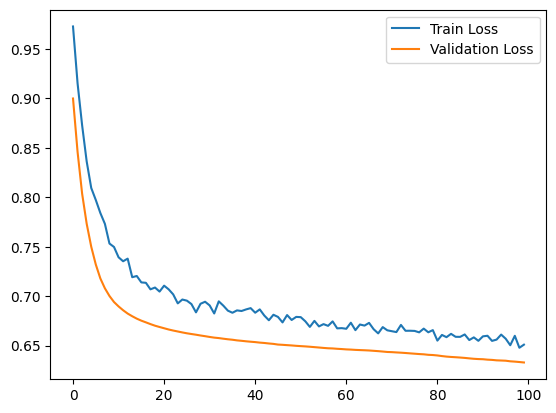

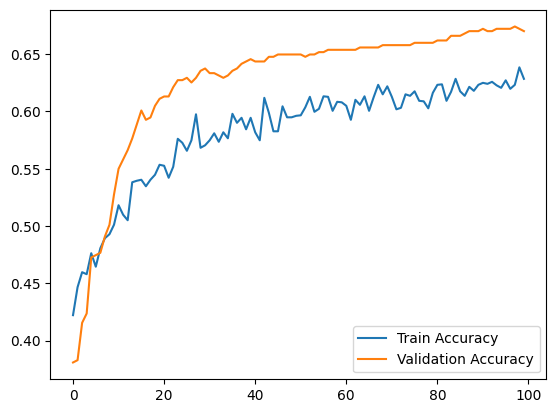

In [21]:
nn_model = Sequential()

# added dropouts to reduce the gap of val_loss and train_loss
from tensorflow.keras.layers import Dropout

nn_model.add(Dense(units=20, activation='relu', input_shape=(x_train_scaled.shape[1],))) #input layer
nn_model.add(Dropout(0.3)) #Dropout
nn_model.add(Dense(units=20, activation='relu')) #hidden layer
nn_model.add(Dropout(0.3)) #Dropout

nn_model.add(Dense(units=1, activation='sigmoid')) #output layer

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# optimizing
from tensorflow.keras.optimizers import Adam

# adding learning rate
optim = Adam(learning_rate=0.0001) #reduced the learning rate
# adding precision and recall to see how well is my model doing
from tensorflow.keras.metrics import Precision, Recall
nn_model.compile(metrics=['accuracy', Precision(name='precision'), Recall(name='recall') ], loss='binary_crossentropy', optimizer=optim)

# traing and evaluating
history = nn_model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping], batch_size=32)

# Plotting Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plotting Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [22]:
loss, accuracy, precision, recall = nn_model.evaluate(x_test_scaled, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6660 - loss: 0.6317 - precision: 0.7723 - recall: 0.1696 
Test Loss: 0.6364
Test Accuracy: 0.6606
Test Precision: 0.7500
Test Recall: 0.1459


## **Trial4**

After the 3rd trial I noticed the model was improving and the difference btn train and validation data was decreasing but the accuracy was low. I decided to increase the learning rate to 0.001 to see if the accuracy will improve

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5326 - loss: 0.7059 - precision: 0.3966 - recall: 0.3982 - val_accuracy: 0.5906 - val_loss: 0.6795 - val_precision: 0.2619 - val_recall: 0.0608
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5598 - loss: 0.6953 - precision: 0.3920 - recall: 0.1811 - val_accuracy: 0.6171 - val_loss: 0.6708 - val_precision: 0.1818 - val_recall: 0.0110
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5916 - loss: 0.6910 - precision: 0.5137 - recall: 0.1796 - val_accuracy: 0.6293 - val_loss: 0.6680 - val_precision: 0.3333 - val_recall: 0.0055
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5983 - loss: 0.6781 - precision: 0.4666 - recall: 0.1190 - val_accuracy: 0.6314 - val_loss: 0.6661 - val_precision: 0.5000 - val_recall: 0.0110
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5975 - loss: 0.6733 - precision: 0.4278 - recall: 0.0942 - val_accuracy: 0.6314 - val_loss: 0.6638

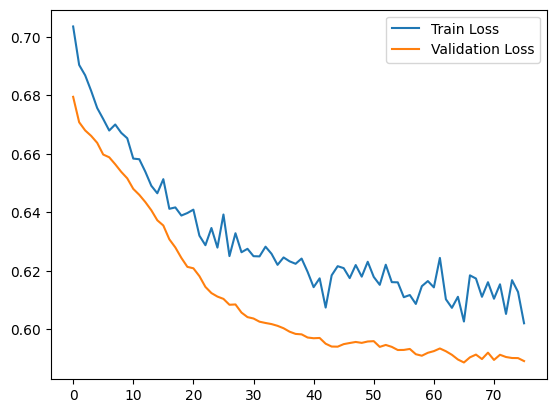

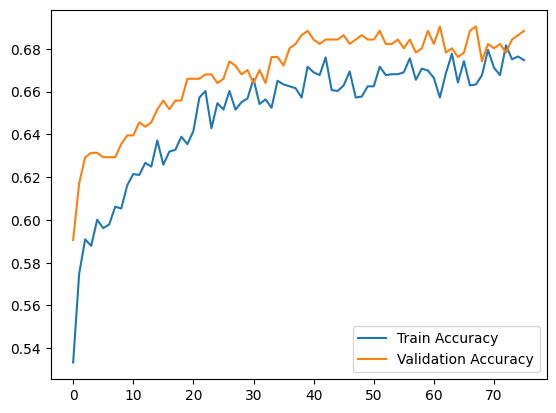

In [23]:
nn_model = Sequential()

# added dropouts to reduce the gap of val_loss and train_loss
from tensorflow.keras.layers import Dropout

nn_model.add(Dense(units=20, activation='relu', input_shape=(x_train_scaled.shape[1],))) #input layer
nn_model.add(Dropout(0.3)) #Dropout
nn_model.add(Dense(units=20, activation='relu')) #hidden layer
nn_model.add(Dropout(0.3)) #Dropout

nn_model.add(Dense(units=1, activation='sigmoid')) #output layer

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# optimizing
from tensorflow.keras.optimizers import Adam

# adding learning rate
optim = Adam(learning_rate=0.001) #increased the learning rate
# adding precision and recall to see how well is my model doing
from tensorflow.keras.metrics import Precision, Recall
nn_model.compile(metrics=['accuracy', Precision(name='precision'), Recall(name='recall') ], loss='binary_crossentropy', optimizer=optim)

# traing and evaluating
history = nn_model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping], batch_size=32)

# Plotting Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plotting Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [24]:
loss, accuracy, precision, recall = nn_model.evaluate(x_test_scaled, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6789 - loss: 0.5913 - precision: 0.6726 - recall: 0.2996 
Test Loss: 0.5951
Test Accuracy: 0.6829
Test Precision: 0.6835
Test Recall: 0.2919


## **Trial5**

After seeing good results from the previous trial I decided to go further improving accurracy and reducing the difference btn train_accurracy and val_accurracy, I decided to decrease the dropout rate to 0.2 and Increase the learning rate to 0.002

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4814 - loss: 0.7639 - precision: 0.3876 - recall: 0.4914 - val_accuracy: 0.6456 - val_loss: 0.6558 - val_precision: 0.6522 - val_recall: 0.0829
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5945 - loss: 0.6804 - precision: 0.4615 - recall: 0.1797 - val_accuracy: 0.6538 - val_loss: 0.6477 - val_precision: 0.6897 - val_recall: 0.1105
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6241 - loss: 0.6605 - precision: 0.5933 - recall: 0.1674 - val_accuracy: 0.6517 - val_loss: 0.6393 - val_precision: 0.6786 - val_recall: 0.1050
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6192 - loss: 0.6573 - precision: 0.5958 - recall: 0.2004 - val_accuracy: 0.6497 - val_loss: 0.6339 - val_precision: 0.6957 - val_recall: 0.0884
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6080 - loss: 0.6576 - precision: 0.5117 - recall: 0.1416 - val_accuracy: 0.6477 - val_loss: 0.6274

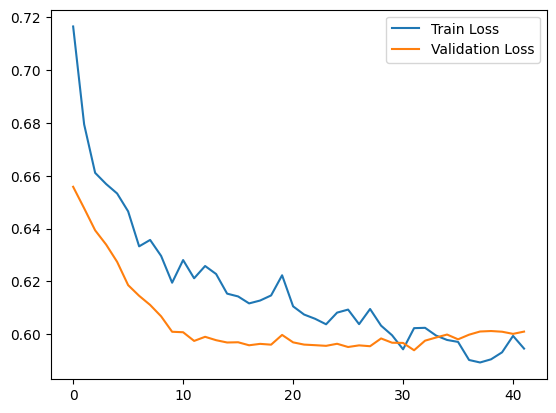

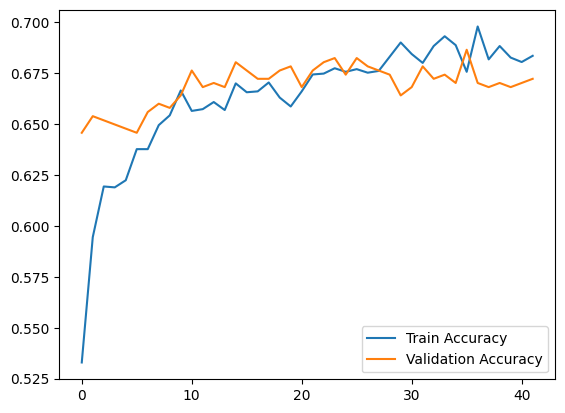

In [25]:
nn_model = Sequential()

# adde dropouts to reduce the gap of val_loss and train_loss
from tensorflow.keras.layers import Dropout

nn_model.add(Dense(units=20, activation='relu', input_shape=(x_train_scaled.shape[1],))) #input layer
nn_model.add(Dropout(0.2)) #Dropout
nn_model.add(Dense(units=20, activation='relu')) #hidden layer
nn_model.add(Dropout(0.2)) #Dropout

nn_model.add(Dense(units=1, activation='sigmoid')) #output layer

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# optimizing
from tensorflow.keras.optimizers import Adam

# adding learning rate
optim = Adam(learning_rate=0.002) #increased the learning rate
# adding precision and recall to see how well is my model doing
from tensorflow.keras.metrics import Precision, Recall
nn_model.compile(metrics=['accuracy', Precision(name='precision'), Recall(name='recall') ], loss='binary_crossentropy', optimizer=optim)

# traing and evaluating
history = nn_model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping], batch_size=32)

# Plotting Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plotting Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [71]:
loss, accuracy, precision, recall = nn_model.evaluate(x_test_scaled, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6631 - loss: 0.5913 - precision: 0.6451 - recall: 0.2499 
Test Loss: 0.5987
Test Accuracy: 0.6768
Test Precision: 0.6970
Test Recall: 0.2486


# **Trial6**

After seeing significant improvements from the previous trial I also decided to see if I can improve the accuracy because it was improving as I want the number wasn't increase as I intended so I decided to add a new layer with dropout and dropout was reduced to 0.1 and increased to 0.01 to see how well the model will perform as I increase the learning rate

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5821 - loss: 0.6786 - precision: 0.4789 - recall: 0.2102 - val_accuracy: 0.6477 - val_loss: 0.6219 - val_precision: 0.6818 - val_recall: 0.0829
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6392 - loss: 0.6457 - precision: 0.6594 - recall: 0.2344 - val_accuracy: 0.6721 - val_loss: 0.5953 - val_precision: 0.6087 - val_recall: 0.3094
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6633 - loss: 0.6182 - precision: 0.6003 - recall: 0.2988 - val_accuracy: 0.6762 - val_loss: 0.6370 - val_precision: 0.5647 - val_recall: 0.5304
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6583 - loss: 0.6274 - precision: 0.6553 - recall: 0.3670 - val_accuracy: 0.6904 - val_loss: 0.5971 - val_precision: 0.6790 - val_recall: 0.3039
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6586 - loss: 0.6278 - precision: 0.6601 - recall: 0.2810 - val_accuracy: 0.6986 - val_loss: 0.5897

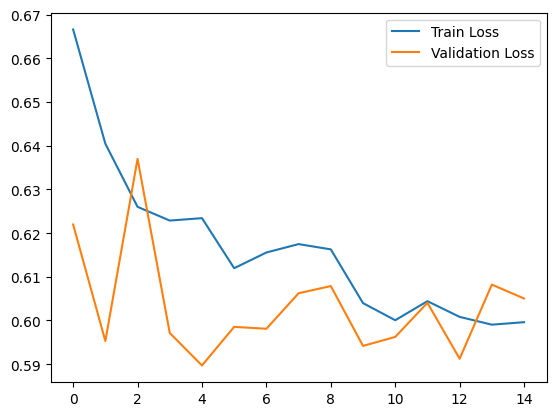

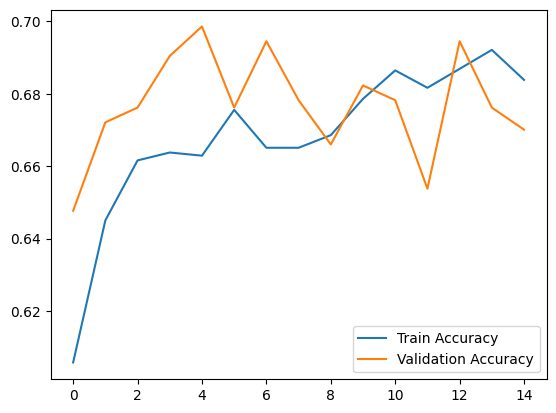

In [26]:
nn_model = Sequential()

# adde dropouts to reduce the gap of val_loss and train_loss
from tensorflow.keras.layers import Dropout

nn_model.add(Dense(units=20, activation='relu', input_shape=(x_train_scaled.shape[1],))) #input layer
nn_model.add(Dropout(0.1)) #Dropout
nn_model.add(Dense(units=20, activation='relu')) #hidden layer
nn_model.add(Dropout(0.1)) #Dropout
# added another layer to see if it will do something
nn_model.add(Dense(units=20, activation='relu')) #hidden layer
nn_model.add(Dropout(0.1)) #Dropout

nn_model.add(Dense(units=1, activation='sigmoid')) #output layer

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# optimizing
from tensorflow.keras.optimizers import Adam

# adding learning rate
optim = Adam(learning_rate=0.01) #increased the learning rate to 0.01 to see how it behaves
# adding precision and recall to see how well is my model doing
from tensorflow.keras.metrics import Precision, Recall
nn_model.compile(metrics=['accuracy', Precision(name='precision'), Recall(name='recall') ], loss='binary_crossentropy', optimizer=optim)

# traing and evaluating
history = nn_model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping], batch_size=32)

# Plotting Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plotting Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [27]:
loss, accuracy, precision, recall = nn_model.evaluate(x_test_scaled, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6646 - loss: 0.6019 - precision: 0.6604 - recall: 0.2406 
Test Loss: 0.6049
Test Accuracy: 0.6707
Test Precision: 0.6885
Test Recall: 0.2270


## **Test7**

After careful seeing this I was confused because of how the were difference during training and validating but seeing at the coming close not as the trial 5 I decided to continue improve it by putting back the learning rate to 0.001 and also I decided to put it to change the epochs so that the model can learn well which mean i had to adjust the patience to 25 for early stopping

Epoch 1/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5176 - loss: 0.6986 - precision: 0.3522 - recall: 0.2278 - val_accuracy: 0.6314 - val_loss: 0.6677 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5985 - loss: 0.6796 - precision: 0.3143 - recall: 0.0029 - val_accuracy: 0.6314 - val_loss: 0.6620 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5824 - loss: 0.6787 - precision: 0.4795 - recall: 6.8435e-04 - val_accuracy: 0.6314 - val_loss: 0.6586 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6095 - loss: 0.6632 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6314 - val_loss: 0.6582 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5847 - loss: 0.6693 - precision: 0.7688 - recall:

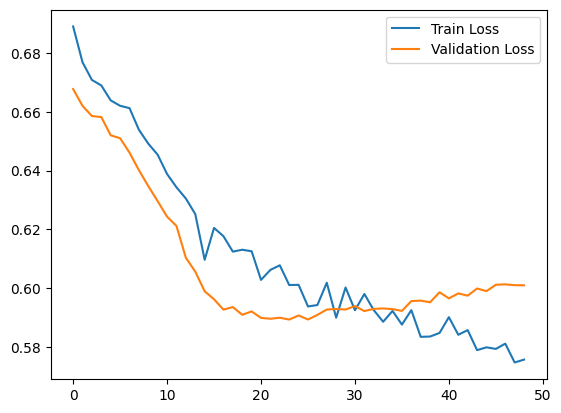

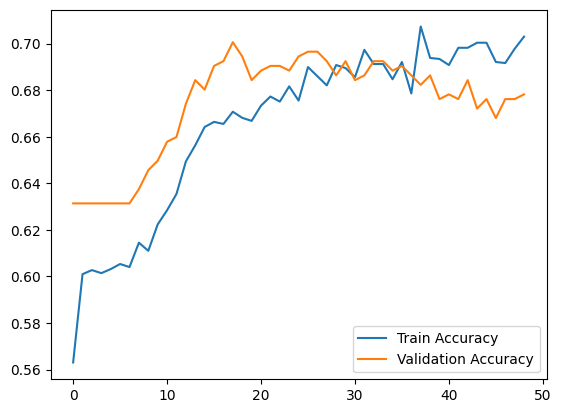

In [51]:
nn_model = Sequential()

# adde dropouts to reduce the gap of val_loss and train_loss
from tensorflow.keras.layers import Dropout

nn_model.add(Dense(units=20, activation='relu', input_shape=(x_train_scaled.shape[1],))) #input layer
nn_model.add(Dropout(0.1)) #Dropout
nn_model.add(Dense(units=20, activation='relu')) #hidden layer
nn_model.add(Dropout(0.1)) #Dropout
# added another layer to see if it will do something
nn_model.add(Dense(units=20, activation='relu')) #hidden layer
nn_model.add(Dropout(0.1)) #Dropout

nn_model.add(Dense(units=1, activation='sigmoid')) #output layer

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# optimizing
from tensorflow.keras.optimizers import Adam

# adding learning rate
optim = Adam(learning_rate=0.001) #increased the learning rate
# adding precision and recall to see how well is my model doing
from tensorflow.keras.metrics import Precision, Recall
nn_model.compile(metrics=['accuracy', Precision(name='precision'), Recall(name='recall') ], loss='binary_crossentropy', optimizer=optim)

# traing and evaluating
history = nn_model.fit(x_train_scaled, y_train, epochs=1000, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping], batch_size=32)

# Plotting Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plotting Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [29]:
loss, accuracy, precision, recall = nn_model.evaluate(x_test_scaled, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6689 - loss: 0.5941 - precision: 0.6464 - recall: 0.2786
Test Loss: 0.6022
Test Accuracy: 0.6748
Test Precision: 0.6543
Test Recall: 0.2865


## **Trial8**
After analyzing the previous trail progress I decided to continue Improve the model because it was showing good progress. I increased again the dropout rate to 0.2 to reduce the memorization of the training data hence increase the performance

Epoch 1/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4646 - loss: 0.7112 - precision: 0.3769 - recall: 0.5606 - val_accuracy: 0.6293 - val_loss: 0.6663 - val_precision: 0.4000 - val_recall: 0.0110
Epoch 2/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5775 - loss: 0.6739 - precision: 0.3645 - recall: 0.0682 - val_accuracy: 0.6314 - val_loss: 0.6587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5974 - loss: 0.6728 - precision: 0.4883 - recall: 0.0314 - val_accuracy: 0.6314 - val_loss: 0.6553 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5987 - loss: 0.6705 - precision: 0.5523 - recall: 0.0415 - val_accuracy: 0.6314 - val_loss: 0.6532 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5859 - loss: 0.6799 - precision: 0.5393 - recall: 0.0252 - val_accur

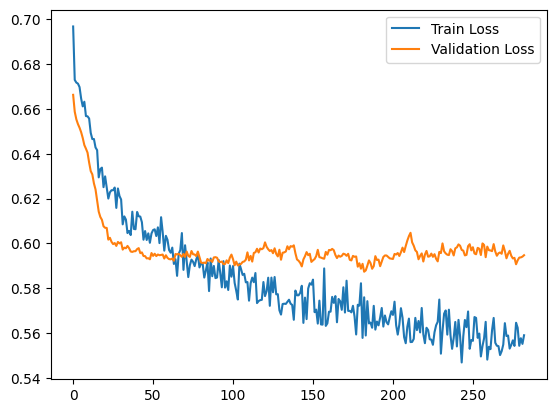

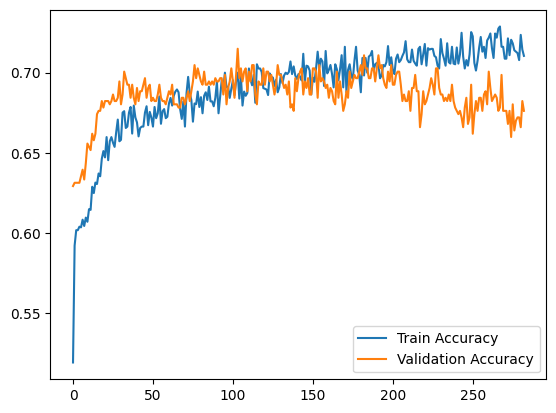

In [54]:
nn_model = Sequential()

# adde dropouts to reduce the gap of val_loss and train_loss
from tensorflow.keras.layers import Dropout

nn_model.add(Dense(units=20, activation='relu', input_shape=(x_train_scaled.shape[1],))) #input layer
nn_model.add(Dropout(0.2)) #Dropout
nn_model.add(Dense(units=20, activation='relu')) #hidden layer
nn_model.add(Dropout(0.2)) #Dropout
# added another layer to see if it will do something
nn_model.add(Dense(units=20, activation='relu')) #hidden layer
nn_model.add(Dropout(0.2)) #Dropout

nn_model.add(Dense(units=1, activation='sigmoid')) #output layer

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# optimizing
from tensorflow.keras.optimizers import Adam

# adding learning rate
optim = Adam(learning_rate=0.001) #increased the learning rate
# adding precision and recall to see how well is my model doing
from tensorflow.keras.metrics import Precision, Recall
nn_model.compile(metrics=['accuracy', Precision(name='precision'), Recall(name='recall') ], loss='binary_crossentropy', optimizer=optim)

# traing and evaluating
history = nn_model.fit(x_train_scaled, y_train, epochs=1000, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping], batch_size=32)

# Plotting Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plotting Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [55]:
loss, accuracy, precision, recall = nn_model.evaluate(x_test_scaled, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6931 - loss: 0.5773 - precision: 0.6799 - recall: 0.3528 
Test Loss: 0.5880
Test Accuracy: 0.7012
Test Precision: 0.6900
Test Recall: 0.3730


## **Trial9**
the previous trial had a good accurracy but the overfitting was still there so I had to change the learning rate to see if help remove overfitting so I changed it to 0.0001

Epoch 1/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5572 - loss: 0.6924 - precision: 0.3957 - recall: 0.2897 - val_accuracy: 0.6314 - val_loss: 0.6741 - val_precision: 0.5000 - val_recall: 0.2652
Epoch 2/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5541 - loss: 0.7069 - precision: 0.4080 - recall: 0.2718 - val_accuracy: 0.6293 - val_loss: 0.6705 - val_precision: 0.4937 - val_recall: 0.2155
Epoch 3/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5638 - loss: 0.6924 - precision: 0.3884 - recall: 0.2288 - val_accuracy: 0.6375 - val_loss: 0.6674 - val_precision: 0.5273 - val_recall: 0.1602
Epoch 4/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5610 - loss: 0.6946 - precision: 0.3655 - recall: 0.1768 - val_accuracy: 0.6436 - val_loss: 0.6658 - val_precision: 0.5789 - val_recall: 0.1215
Epoch 5/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5997 - loss: 0.6866 - precision: 0.4861 - recall: 0.2139 - val_accuracy: 0.6456 - val_loss: 0

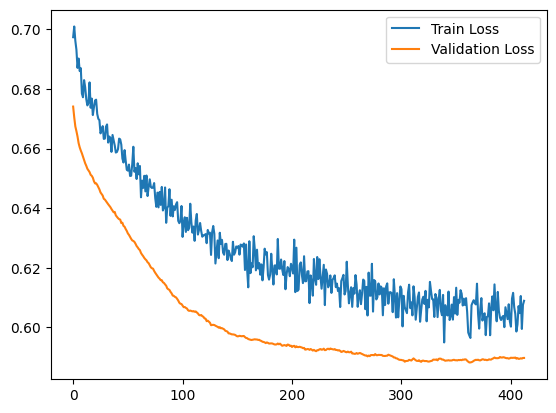

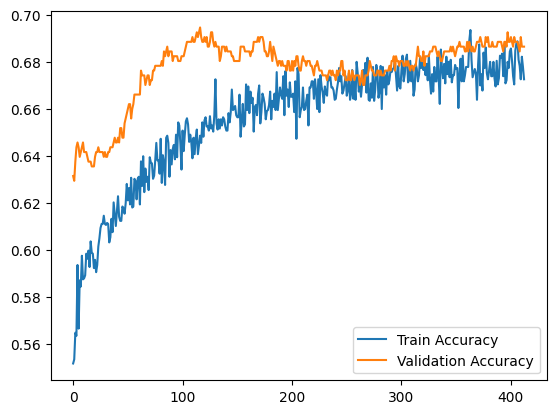

In [42]:
nn_model = Sequential()

# added dropouts to reduce the gap of val_loss and train_loss
from tensorflow.keras.layers import Dropout

nn_model.add(Dense(units=20, activation='relu', input_shape=(x_train_scaled.shape[1],))) #input layer
nn_model.add(Dropout(0.2)) #Dropout
nn_model.add(Dense(units=20, activation='relu')) #hidden layer
nn_model.add(Dropout(0.2)) #Dropout
# added another layer to see if it will do something
nn_model.add(Dense(units=20, activation='relu')) #hidden layer
nn_model.add(Dropout(0.2)) #Dropout

nn_model.add(Dense(units=1, activation='sigmoid')) #output layer

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# optimizing
from tensorflow.keras.optimizers import Adam

# adding learning rate
optim = Adam(learning_rate=0.0001) #reduced the learning rate
# adding precision and recall to see how well is my model doing
from tensorflow.keras.metrics import Precision, Recall
nn_model.compile(metrics=['accuracy', Precision(name='precision'), Recall(name='recall') ], loss='binary_crossentropy', optimizer=optim)

# traing and evaluating
history = nn_model.fit(x_train_scaled, y_train, epochs=1000, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping], batch_size=32)

# Plotting Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plotting Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [43]:
loss, accuracy, precision, recall = nn_model.evaluate(x_test_scaled, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6933 - loss: 0.5885 - precision: 0.6796 - recall: 0.3611
Test Loss: 0.5950
Test Accuracy: 0.6951
Test Precision: 0.6842
Test Recall: 0.3514


## **Trial10**

After care full analysis the model was quite confusing on how it is behaving so I added batch normalization to stabilize the model and see how well it will perform

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5094 - loss: 0.8538 - precision: 0.4022 - recall: 0.4884 - val_accuracy: 0.4725 - val_loss: 0.7052 - val_precision: 0.3415 - val_recall: 0.4641
Epoch 2/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4882 - loss: 0.8738 - precision: 0.3798 - recall: 0.4584 - val_accuracy: 0.5071 - val_loss: 0.7072 - val_precision: 0.3581 - val_recall: 0.4254
Epoch 3/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4972 - loss: 0.8587 - precision: 0.3872 - recall: 0.4844 - val_accuracy: 0.5153 - val_loss: 0.7103 - val_precision: 0.3596 - val_recall: 0.4033
Epoch 4/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5214 - loss: 0.8114 - precision: 0.4230 - recall: 0.5078 - val_accuracy: 0.5193 - val_loss: 0.7126 - val_precision: 0.3604 - val_recall: 0.3923
Epoch 5/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4853 - loss: 0.8419 - precision: 0.3709 - recall: 0.4314 - val_accuracy: 0.5295 - val_loss: 0

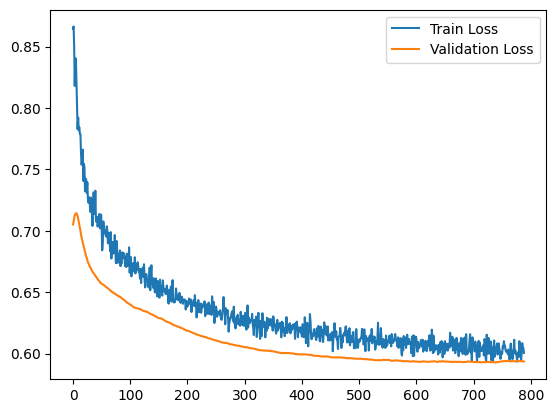

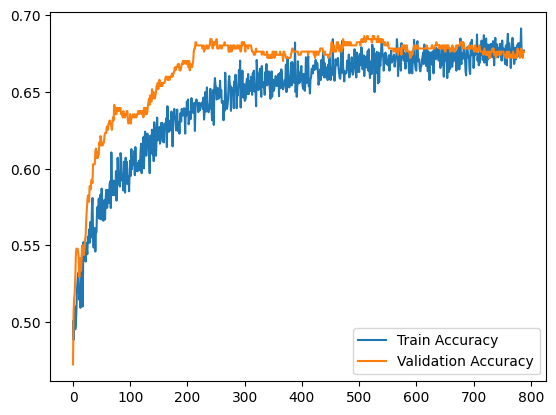

In [44]:
from tensorflow.keras.layers import BatchNormalization
nn_model = Sequential()

# adde dropouts to reduce the gap of val_loss and train_loss
from tensorflow.keras.layers import Dropout

nn_model.add(Dense(units=20, activation='relu', input_shape=(x_train_scaled.shape[1],))) #input layer
nn_model.add(BatchNormalization()) #adding batch normalization
nn_model.add(Dropout(0.2)) #Dropout
nn_model.add(Dense(units=20, activation='relu')) #hidden layer
nn_model.add(BatchNormalization()) #adding batch normalization
nn_model.add(Dropout(0.2)) #Dropout
# added another layer to see if it will do something
nn_model.add(Dense(units=20, activation='relu')) #hidden layer
nn_model.add(BatchNormalization()) #adding batch normalization
nn_model.add(Dropout(0.2)) #Dropout

nn_model.add(Dense(units=1, activation='sigmoid')) #output layer

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# optimizing
from tensorflow.keras.optimizers import Adam

# adding learning rate
optim = Adam(learning_rate=0.0001) #reduced the learning rate
# adding precision and recall to see how well is my model doing
from tensorflow.keras.metrics import Precision, Recall
nn_model.compile(metrics=['accuracy', Precision(name='precision'), Recall(name='recall') ], loss='binary_crossentropy', optimizer=optim)

# traing and evaluating
history = nn_model.fit(x_train_scaled, y_train, epochs=1000, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping], batch_size=64)

# Plotting Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plotting Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [45]:
loss, accuracy, precision, recall = nn_model.evaluate(x_test_scaled, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6936 - loss: 0.5845 - precision: 0.7067 - recall: 0.3274 
Test Loss: 0.5921
Test Accuracy: 0.6951
Test Precision: 0.7059
Test Recall: 0.3243


In [48]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_prob = nn_model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test, y_pred))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       307
           1       0.71      0.32      0.44       185

    accuracy                           0.70       492
   macro avg       0.70      0.62      0.62       492
weighted avg       0.70      0.70      0.66       492



# **Conclusion**

To sum up all I can say that at trail 5 and trail 10 I was satisfied by their result according to what I wanted the difference btn train_accuracy and val_accuracy is close and the loss and val_loss is them there isn't much difference which means my model is not memorizing the data. So I will continue to do further more expirements to improve my model and how far I can get